In [21]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pylab as plt
import glob
import os
import numpy as np

In [22]:
def test_auc(tf_path):
    """Take a tf output path and create a list of values for the validtion auc of an experement"""
    auc = []
    for event in summary_iterator(tf_path):
        for value in event.summary.value:
            if value.tag == "final/F1":
                auc.append(value.simple_value)
    return auc

def plot_splits(root_dir,ax,data_size,c,label=None, marker="o"):
    # Set the root directory to search
    all_aucs = []
    file_extension = "*.gpu1"
    # Recursively traverse the directory and its subdirectories
    for subdir, _, files in os.walk(root_dir):
        # Use glob to find all files with the specified extension
        for file in glob.glob(os.path.join(subdir, file_extension)):
            auc = test_auc(file)
            all_aucs.append(auc[0])
    # plot mean and range  
    mean = np.mean(all_aucs,axis=0)
    std = np.std(all_aucs,axis=0)
    standard_error = std/np.sqrt(len(all_aucs))
    if data_size != 3:
        label = None
    ax.errorbar(data_size,mean,yerr=standard_error, fmt='o',capsize=5,alpha=1,c=c, label=label, marker=marker)

    ax.set_xticks([3,4,5])
    ax.set_xticklabels([r'$10^{-3}$',r'$10^{-4}$',r'$10^{-5}$'])

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

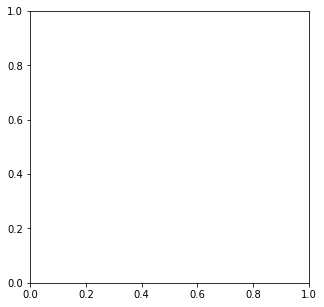

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
magnification = "20X"
fig.patch.set_facecolor('white')

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


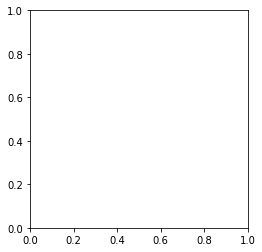

In [24]:
datasets = ["DLBCL"]
for idx, dataset in enumerate(datasets): 
    run_name =  "/" + dataset + "/" + dataset
    learning_rates = [3,4,5]
    for run in learning_rates:

        # Flocknet 1x 
        root_dir = "../results_"+ magnification + run_name + "_FlockNet1X_" + str(run) +"_s1"
        plot_splits(root_dir,axes,run,"springgreen", "BEVNet 1X", marker='^')

        # # # Flocknet 2x 
        root_dir = "../results_"+ magnification + run_name + "_FlockNet2X_" + str(run) +"_s1"
        plot_splits(root_dir,axes,run,"violet", "BEVNet 2X", marker='^')

        # dino baseline
        root_dir = "../results_"+ magnification + run_name + "_imagenet_dino_baseline_" + str(run) +"_s1"
        plot_splits(root_dir,axes,run,"dodgerblue", "ImageNet")

        # ImageNet_Large
        root_dir = "../results_"+ magnification + run_name + "_ImageNet_Large_" + str(run) +"_s1"
        plot_splits(root_dir,axes,run,"blue", "ImageNet 10X")

        # # random
        root_dir = "../results_"+ magnification + run_name + "_random_" + str(run) +"_s1"
        plot_splits(root_dir,axes,run,"black", "random", marker='s')

   

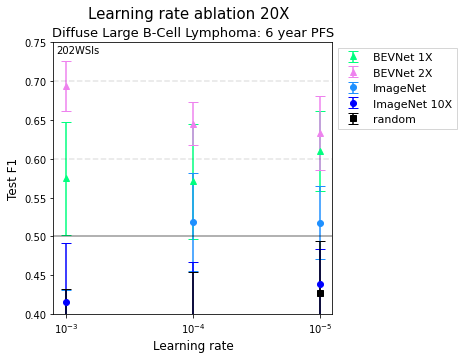

In [25]:
fig.suptitle('Learning rate ablation ' + magnification, fontsize=15, y=0.98)

axes.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=11, fancybox=False, shadow=False, ncol=1)

axes.set_title("Diffuse Large B-Cell Lymphoma: 6 year PFS", fontsize=13)
axes.text(.01, .99, '202WSIs', ha='left', va='top', transform=axes.transAxes)

axes.set_xlabel("Learning rate",fontsize=12)
axes.set_ylabel("Test F1", fontsize=12)

# Loop over each axes and add dashed lines
axes.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
axes.axhline(0.6, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
axes.axhline(0.7, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
axes.axhline(0.8, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
axes.axhline(0.9, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0t
axes.axhline(1, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
axes.set_ylim([0.40,0.75])

display(fig)
fig.savefig('../figures/Lr_abalation_lymphoma.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')